In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FLP
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

reload


In [3]:
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-06-05_18-42-11_'
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-06-10_11-10-03_'
# flp = FLP.FlexLogPol(path,concat=True)
# self = FLP.FlexLogPol(path,concat=False)
self = FLP.FlexLogPol(
    path,
#     concat=True,
    concat=False,
    get_clusters=False,
    open_merged=True,
    clusters_avail=False
)

'using vol for conc'


In [4]:
self.reset_z_levels()

'using vol for conc'


In [5]:
self.python_cluster(n_cluster=15)

In [6]:
i = 5 

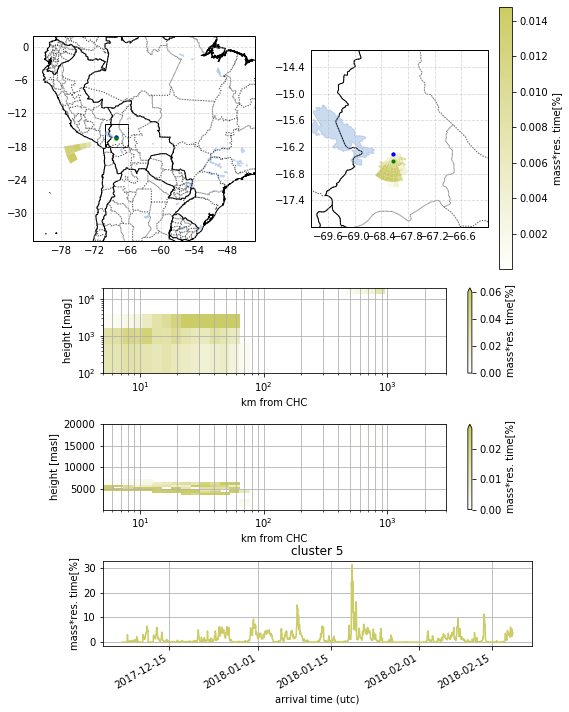

In [80]:
fig = self.plot_cluster_grid(i=i,par_to_plot=co.CPer)

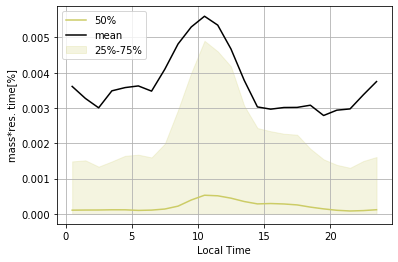

In [154]:
self.plot_hout_influence(i)